<a href="https://colab.research.google.com/github/Debojyoti83/Predicting-Driver-Attrition-for-Ola-A-Data-Driven-Approach-Using-Ensemble-Learning-and-KNN-Imputati/blob/main/OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**OLA - Ensemble Learning**

#**Import Libraries :**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Stats & model building
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve, average_precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE
from collections import Counter

# supress warnings
import warnings
warnings.filterwarnings('ignore')

#**Loading The Dataset :**

In [ ]:
!gdown 1hynReJP4g5io0He2MdeiI9Fu0vaLEPnB

Downloading...
From: https://drive.google.com/uc?id=1hynReJP4g5io0He2MdeiI9Fu0vaLEPnB
To: /content/ola_driver.csv
100% 1.13M/1.13M [00:00<00:00, 101MB/s]


In [ ]:
Data = pd.read_csv("/content/ola_driver.csv")

In [ ]:
df = Data.copy(deep=True)

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.tail()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


In [ ]:
print('Rows:', df.shape[0],'\n' 'Columns: ',df.shape[1])

Rows: 19104 
Columns:  14


**Insight :**
 * Target variable is LastWorkingDate

#**Concise Summary & Necessary Changes :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

In [ ]:
# Numeric columns
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
# number of unique values for categorcal vairbales
for col in cat_cols:
    print(f"{col:20}: {df[col].nunique()}")

MMM-YY              : 24
City                : 29
Dateofjoining       : 869
LastWorkingDate     : 493


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

**Insights:**

 * There are 4 categorical datatype columns in the dataset.
 * There are 10 numerical datatype columns in the dataset.
 * The column **" Unnamed: 0 "**  is not required for our analysis, we can drop it.

**Converting some related fields:**

In [ ]:
# converting time specific columns into datetime variables
# As LastWorkingDate is the target variable we didn't convert that.

df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])
df['Yearofreporting'] = df['MMM-YY'].dt.year
df['Monthofreporting'] = df['MMM-YY'].dt.month

df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])
df['Yearofjoining'] = df['Dateofjoining'].dt.year
df['Monthofjoining'] = df['Dateofjoining'].dt.month

df.rename(columns = {'MMM-YY':'ReportingDate'}, inplace = True)

#**Statistical Summary :**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ReportingDate,19104,24,2019-01-01 00:00:00,1022,2019-01-01,2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,NaT,NaT,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,NaT,NaT,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,NaT,NaT,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,NaT,NaT,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,NaT,NaT,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,2015-07-23 00:00:00,192,2013-04-01,2020-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,NaT,NaT,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


**Insights:**
 * We observe difference in counts indicating missing values in a fea columns.
 * Mean and Median for Income and Total Business Value significantly differ and indicative of outliers.

**Cheking Duplicate values:**

In [ ]:
df.duplicated().sum()

0

**Insights:**
 * There are no duplicates in the dataset

#**Missing Values & Their Treatment :**

In [ ]:
# Function to create a data frame with number and percentage of missing data in a data frame

def missing_to_df(df):
    # Number and percentage of missing data in data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [ ]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
LastWorkingDate,17488,91.541039
Age,61,0.319305
Gender,52,0.272194


**Insights:**

 * LastWorkingDate has highest number of missing values followed by Age and Gender have less than 0.5% missing values.
 * LastWorkingDate is the target variable (drivers are churn or not).
 * So for drivers, who are in active status, their Last Working Date value is Null. when we will separate target column we will treat the null as 0 otherwise 1 (as churn or not).

#**Unique Values check:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ReportingDate         19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Yearofreporting 

In [ ]:
df.nunique()

ReportingDate              24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
Yearofreporting             2
Monthofreporting           12
Yearofjoining               8
Monthofjoining             12
dtype: int64

**Insights:**
 * Dataset for 24 months for drivers in 29 different cities.
 * Our dataset has 18991 entries for 2381 unique drivers.
 * 493 drivers have churned out of the 2381 drivers.
 * 5 unique grades and designation, 4 unique quarterly ratings and 3 education level for the drivers.

#**Graphical Analysis :**

----------------------------------------------------------------------
Univariate Analysis - Histogramscountplots of Categorical Variables
----------------------------------------------------------------------


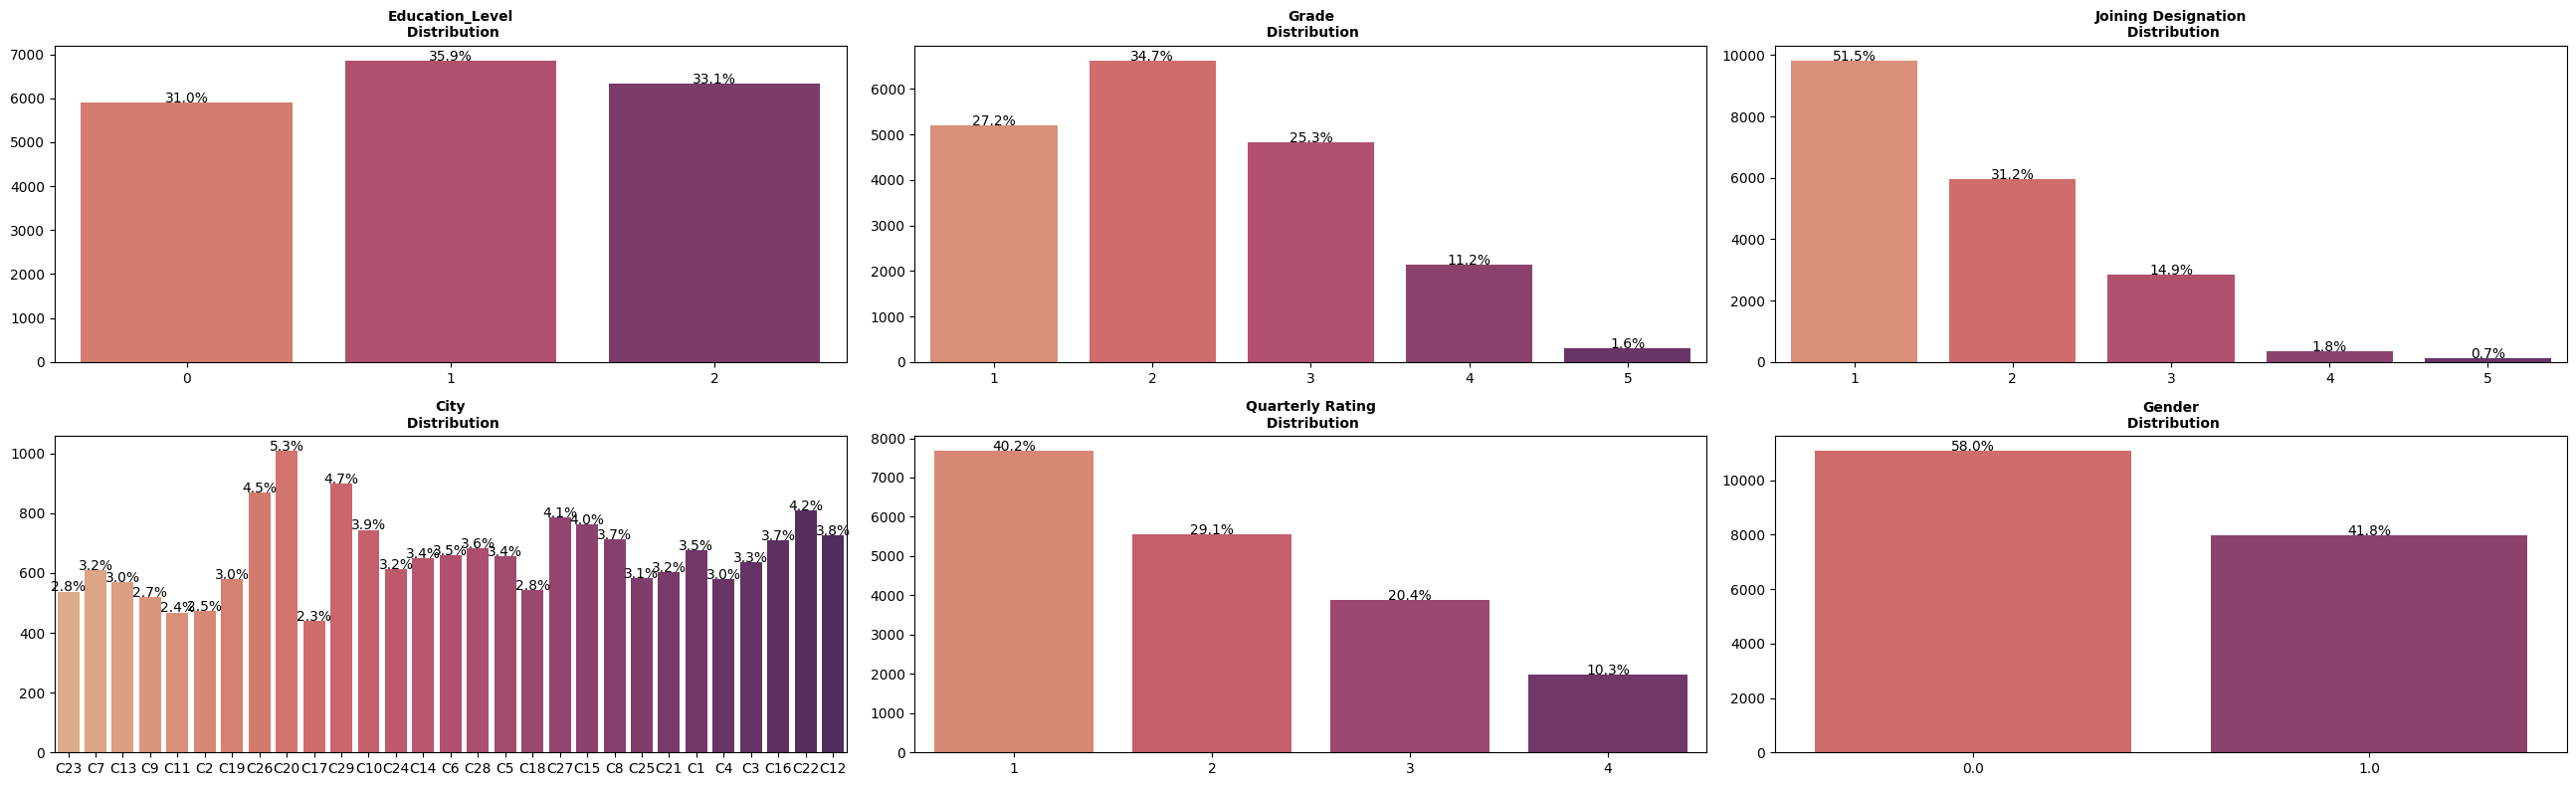

In [ ]:
categorical_cols = ['Education_Level', "Grade", 'Joining Designation', 'City', 'Quarterly Rating', 'Gender']
print('-'*70)
print('Univariate Analysis - Histogramscountplots of Categorical Variables')
print('-'*70)

plt.figure(figsize=(26, 8))

for index, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, index)  # 2 rows, 3 columns for a 2x3 grid
    ax = sns.countplot(x=column, data=df, palette='flare')

    total = float(len(df[column]))  # Total number of observations

    # Adding percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 0.3,  # Adjust the position of the text for better visibility
                '{:.1f}%'.format((height/total) * 100),
                ha="center")

    plt.ylabel('')
    plt.xlabel('')
    plt.title(column + '\n Distribution', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Insights :**
 * City code with C20 has highest no.of drivers followed by C29 and C26.
 * 42% are women and 58% are men drivers.
 * 40% of drivers have a rating of 1 and only 10% have rating of 4.
 * Only 2.5% have a joining designation of 4 or 5. 51% have a designation of 1.So, can assume that high experiance drivers are less,its a indicator of  attrition probleam.
 * 35% of drivers fall into grade 2 and only 13% fall into a higher grade like 4 or 5.
 * More or less equal distribution of drivers at each of the three Education levels= 10+,12+ and graduate.

In [ ]:
def uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,2))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})

    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

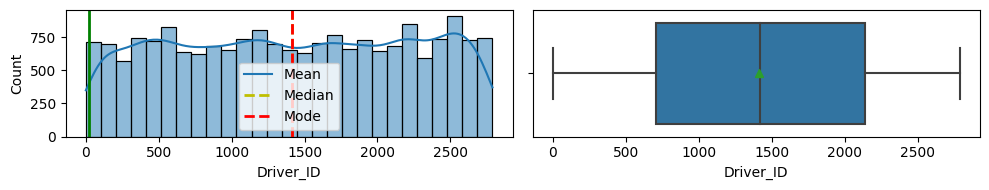

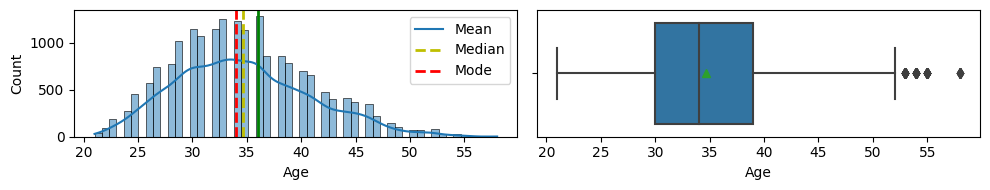

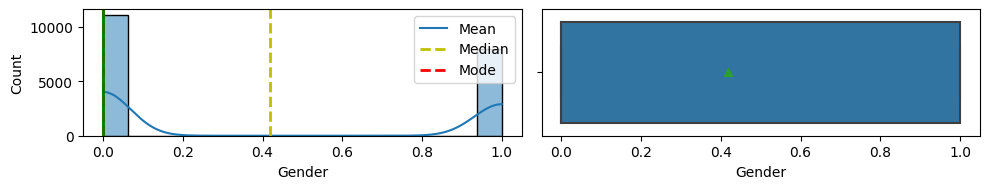

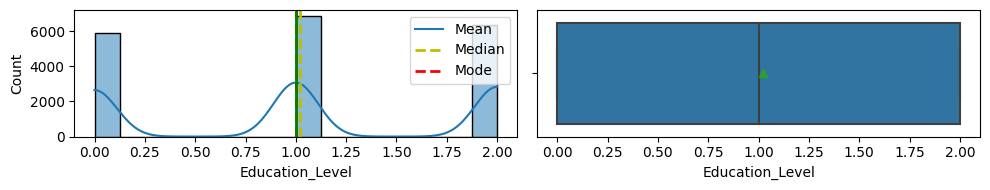

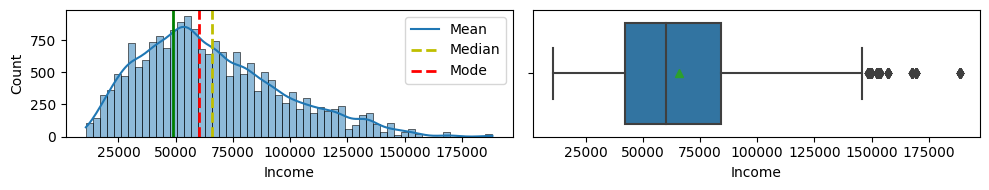

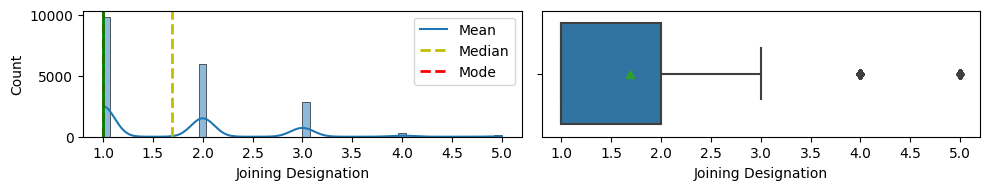

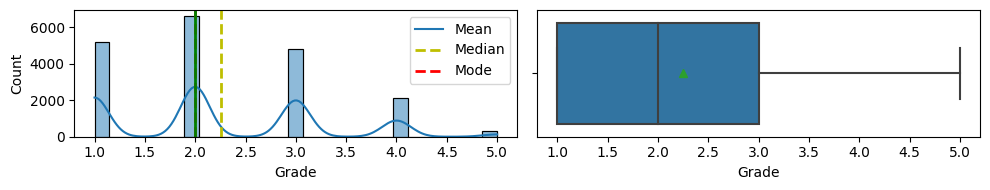

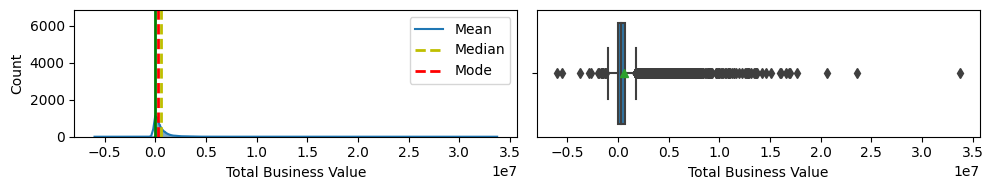

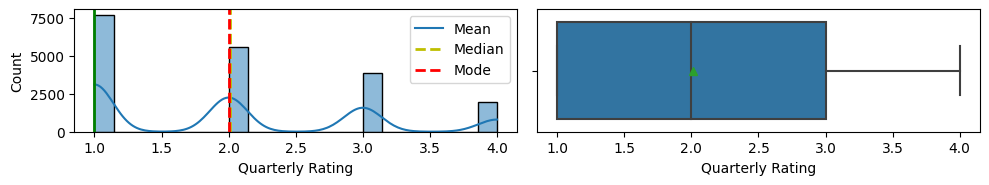

In [ ]:
numerical_cols = ['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
for f in numerical_cols:
    uni(df[f])
plt.show()

**Insights :**
 * The total busines value is highly skewed with very high outliers indicating that a small chunk of drivers contribute to the total revenue of the company.
 * Income distribution is slightly right skewed with some outliers.

#**Outlier Treatment :**

In [ ]:
#Columns identified to have Outliers
outlier_columns = ['Total Business Value', 'Income']

In [ ]:
#treating outliers:
def treat_outlier(variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1,q3=np.percentile(variable,[25,75])
    iqr = q3-q1
    lo_range = q1-(1.5*iqr)
    up_range = q3+(1.5*iqr)
    return lo_range,up_range

In [ ]:
for col in outlier_columns:
    ir,ur=treat_outlier(df[col])
    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<ir,ir,df[col])

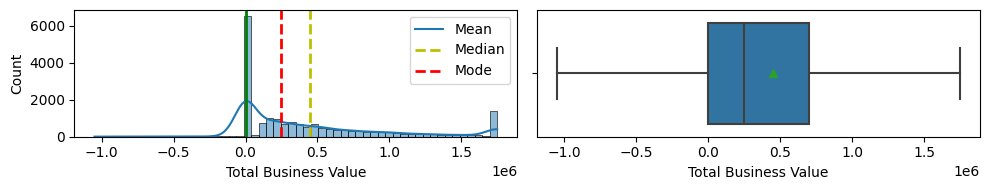

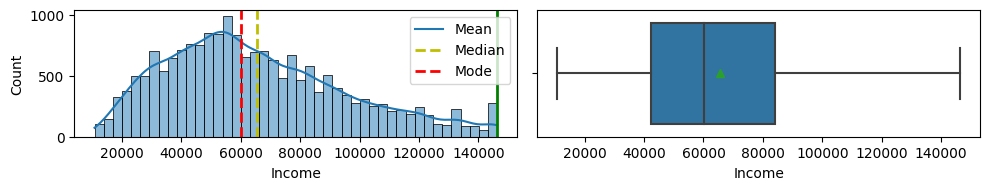

In [ ]:
#Lets check where outliers are removed or not:
for f in outlier_columns:
    uni(df[f])
plt.show()

#**Feature Engineering**

**Creating the target variable indicating if the driver has left the company**
 * If a driver has a last working date as non-null we assign a value of 1 (Churn = True, driver left )
 * If the last working date value is null and does not have a last working date are assigned value of 0 (Churn = False, driver not left )

In [ ]:
df["LastWorkingDate"] = df["LastWorkingDate"].apply(lambda x: 0 if pd.isnull(x) else 1)

**KNN Imputation for missing values :**

In [ ]:
# Selecting numerical columns
df_nums=df.select_dtypes(np.number)

In [ ]:
df_nums.isnull().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
LastWorkingDate          0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
Yearofreporting          0
Monthofreporting         0
Yearofjoining            0
Monthofjoining           0
dtype: int64

In [ ]:
# Driver_ID column not imortant for KNN imputation, so drop the column.
# KNN imputation removes the column names, hence we are storing the column details, so that we can add them back after missing value imputation
df_nums.drop(columns='Driver_ID',inplace=True)
columns=df_nums.columns

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean',)
imputer.fit(df_nums)
# transform the dataset
df_1 = imputer.transform(df_nums)

In [ ]:
df_1=pd.DataFrame(df_1)

In [ ]:
## Adding the columns names
df_1.columns=columns

In [ ]:
df_1.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
LastWorkingDate         0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
Yearofreporting         0
Monthofreporting        0
Yearofjoining           0
Monthofjoining          0
dtype: int64

In [ ]:
# Adding the remaining columns (non-numerical) to the datafram
remaining_columns=list(set(df.columns).difference(set(columns)))
remaining_columns

['ReportingDate', 'Dateofjoining', 'Driver_ID', 'City']

In [ ]:
df_2=pd.concat([df[remaining_columns],df_1],axis=1)
df_2.head()

,ReportingDate,Dateofjoining,Driver_ID,City,Age,Gender,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining
0,2019-01-01,2018-12-24,1,C23,28.0,0.0,2.0,57387.0,0.0,1.0,1.0,1749250.0,2.0,2019.0,1.0,2018.0,12.0
1,2019-02-01,2018-12-24,1,C23,28.0,0.0,2.0,57387.0,0.0,1.0,1.0,-665480.0,2.0,2019.0,2.0,2018.0,12.0
2,2019-03-01,2018-12-24,1,C23,28.0,0.0,2.0,57387.0,1.0,1.0,1.0,0.0,2.0,2019.0,3.0,2018.0,12.0
3,2020-11-01,2020-11-06,2,C7,31.0,0.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,2020.0,11.0,2020.0,11.0
4,2020-12-01,2020-11-06,2,C7,31.0,0.0,2.0,67016.0,0.0,2.0,2.0,0.0,1.0,2020.0,12.0,2020.0,11.0


**Aggregate the records :**

In [ ]:
agg_dict = {'ReportingDate':'last', 'Age':'max', 'Gender':'first','City':'first',
 'Education_Level':'last', 'Income':'last',
 'Joining Designation':'last','Grade':'last',
 'Dateofjoining':'first','LastWorkingDate':'last',
 'Total Business Value':'sum','Quarterly Rating':'last',
  'Yearofreporting':'last', 'Monthofreporting':'last' ,'Yearofjoining': 'first','Monthofjoining':'first'}

In [ ]:
df_2_agg=df_2.groupby(['Driver_ID']).aggregate(agg_dict)

In [ ]:
# we observed that reporting date column needs to be sorted.
df_2=df_2_agg.sort_values(by=["Driver_ID"], ascending=True).reset_index()

In [ ]:
df_2.columns

Index(['Driver_ID', 'ReportingDate', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Joining Designation', 'Grade',
       'Dateofjoining', 'LastWorkingDate', 'Total Business Value',
       'Quarterly Rating', 'Yearofreporting', 'Monthofreporting',
       'Yearofjoining', 'Monthofjoining'],
      dtype='object')

In [ ]:
df_2.head()

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining
0,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,1.0,1083770.0,2.0,2019.0,3.0,2018.0,12.0
1,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,0.0,0.0,1.0,2020.0,12.0,2020.0,11.0
2,4,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,1.0,350000.0,1.0,2020.0,4.0,2019.0,12.0
3,5,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,1.0,120360.0,1.0,2019.0,3.0,2019.0,1.0
4,6,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,0.0,1265000.0,2.0,2020.0,12.0,2020.0,7.0


**Creating binary flags for driver rating increase**
 * If the quarterly rating has increased for a driver, we assign the value 1 else 0

In [ ]:
# Quarterly rating at the beginning
qrf = df.groupby('Driver_ID')['Quarterly Rating'].first()

# Quarterly rating at the end
qrl = df.groupby('Driver_ID')['Quarterly Rating'].last()

# Creating a Series to indicate rating increase (True/False)
rating_increase = (qrl > qrf).reset_index()

# Extracting Driver IDs with increased ratings
driver_ids_with_increase = rating_increase[rating_increase['Quarterly Rating']]['Driver_ID']

# Creating the rating flag list
rating_flag = [1 if driver_id in driver_ids_with_increase.values else 0 for driver_id in df_2['Driver_ID']]

# Assigning flags to the driver IDs in df_1
df_2['Qtr_Rating_Inc'] = rating_flag

**Creating binary flags for driver income increase**
 * If the income has increased for a driver, we assign the value 1 else 0

In [ ]:
# Income at the beginning
inc_f = df.groupby('Driver_ID')['Income'].first()

# Income at the end
inc_l = df.groupby('Driver_ID')['Income'].last()

# Creating a Series to indicate income increase (True/False)
income_increase = (inc_l > inc_f).reset_index()

# Extracting Driver IDs with increased income
driver_ids_with_increase_inc = income_increase[income_increase['Income']]['Driver_ID']

# Creating the income flag list
income_flag = [1 if driver_id in driver_ids_with_increase_inc.values else 0 for driver_id in df_2['Driver_ID']]

# Assigning flags to the driver IDs in df_1
df_2['Income_Inc'] = rating_flag

In [ ]:
df_2.head()

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining,Qtr_Rating_Inc,Income_Inc
0,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,1.0,1083770.0,2.0,2019.0,3.0,2018.0,12.0,0,0
1,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,0.0,0.0,1.0,2020.0,12.0,2020.0,11.0,0,0
2,4,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,1.0,350000.0,1.0,2020.0,4.0,2019.0,12.0,0,0
3,5,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,1.0,120360.0,1.0,2019.0,3.0,2019.0,1.0,0,0
4,6,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,0.0,1265000.0,2.0,2020.0,12.0,2020.0,7.0,1,1


In [ ]:
# Changing the name of 'TARGET' variable to 'Churn'
df_2.rename(columns = {'LastWorkingDate':'Churn'}, inplace = True)

In [ ]:
df_final = df_2
df_final.head()

,Driver_ID,ReportingDate,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,Churn,Total Business Value,Quarterly Rating,Yearofreporting,Monthofreporting,Yearofjoining,Monthofjoining,Qtr_Rating_Inc,Income_Inc
0,1,2019-03-01,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,1.0,1083770.0,2.0,2019.0,3.0,2018.0,12.0,0,0
1,2,2020-12-01,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,0.0,0.0,1.0,2020.0,12.0,2020.0,11.0,0,0
2,4,2020-04-01,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,1.0,350000.0,1.0,2020.0,4.0,2019.0,12.0,0,0
3,5,2019-03-01,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,1.0,120360.0,1.0,2019.0,3.0,2019.0,1.0,0,0
4,6,2020-12-01,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,0.0,1265000.0,2.0,2020.0,12.0,2020.0,7.0,1,1


#**Statistical Summary of the final dataset post feature engineering**

In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.375535e+01,5.954052e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.109618e-01,4.917914e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.927993e+04,2.819408e+04,10747.0,39104.0,55315.0,75986.0,146348.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Churn,2381.0,6.787064e-01,4.670713e-01,0.0,0.0,1.0,1.0,1.0
Total Business Value,2381.0,3.602633e+06,6.112276e+06,-844810.0,0.0,812710.0,3980440.0,33143390.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0


**Insights :**
 * 2381 unique drivers
 * Driver median age is 33 years and ranging from 21 yrs to 58 yrs(max).
 * Mean monthly income is 59279 and 75% of driver population have their monthly income <= 75,986.
 * 50% of the drivers have acquired total busines value of 8,12,710.

**Target Variable**

In [ ]:
df_final["Churn"].value_counts()

1.0    1616
0.0     765
Name: Churn, dtype: int64

In [ ]:
df_final['Churn'].value_counts(normalize=True)*100

1.0    67.870643
0.0    32.129357
Name: Churn, dtype: float64

**Insights :**
 * Approx 68% of the driver population has left the company

#**Bivariate Analysis of target variable with the features**

**Age - Churn relationship**

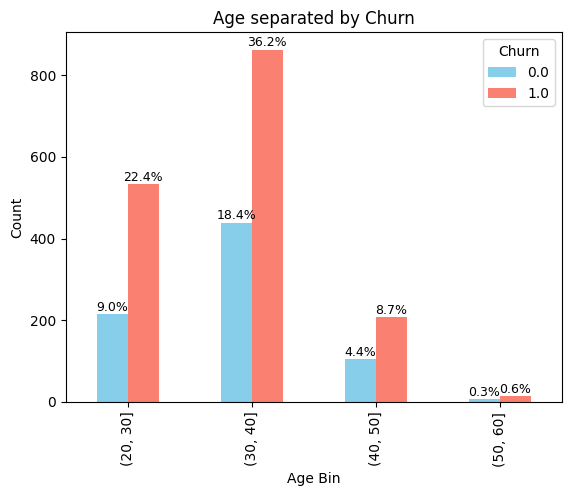

In [ ]:
#Binning the Age into categories
df_final['Age_Bin'] = pd.cut(df_final['Age'],bins=[20,30,40,50,60])

# Plotting the bar chart
agebin = pd.crosstab(df_final['Age_Bin'], df_final['Churn'])
ax = agebin.plot(kind='bar', stacked=False, title="Age separated by Churn", color=['skyblue', 'salmon'])

plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(agebin.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insights :**
 * Drivers in the 30-40 years bracket have the highest churn percentage.
 * Lower churn in the above 40 years bracket.

**Income-Churn relationship**

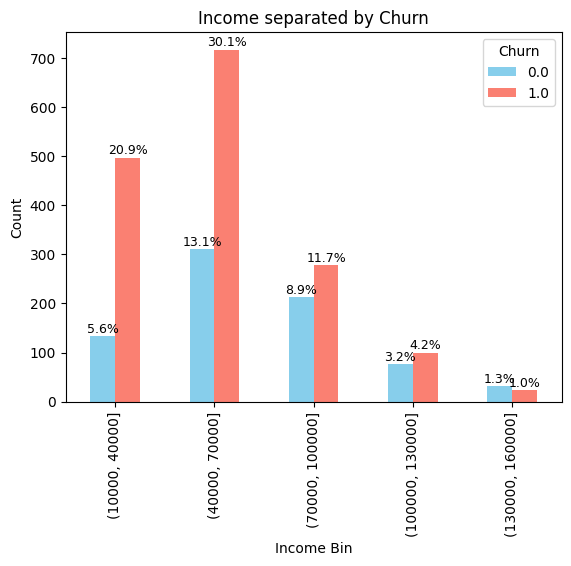

In [ ]:
# Binning the Income into categories
df_final['Income_Bin'] = pd.cut(df_final['Income'], bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000])

# Income feature with Target (Churn)
incomebin = pd.crosstab(df_final['Income_Bin'], df_final['Churn'])
ax = incomebin.plot(kind='bar', stacked=False, title="Income separated by Churn", color=['skyblue', 'salmon'])

plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(incomebin.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insights :**
 * Drivers with lower income are more likely to churn.
 * Drivers in the 40K-70K bracket have the highest churn percentage.
 * Drivers whose monthly income is above 100K  are less likely to leave the organization

**Qtr_Rating_Inc feature with City**

<Figure size 2600x800 with 0 Axes>

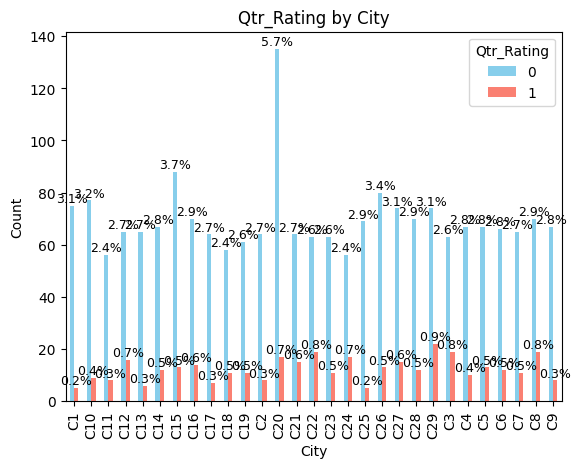

In [ ]:
# Qtr_Rating_Inc feature with City
plt.figure(figsize=(26, 8))
r_city = pd.crosstab(df_final['City'], df_final['Qtr_Rating_Inc'])
ax = r_city.plot(kind='bar', stacked=False, title="Qtr_Rating by City", color=['skyblue', 'salmon'])

plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Qtr_Rating', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(r_city.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insight:**
 * C29 city has the heighest % of driver whose Rating was increased.
 * C20 city has the heighest % of driver whose Rating was not increased.

**Income-Total Business Relationship**

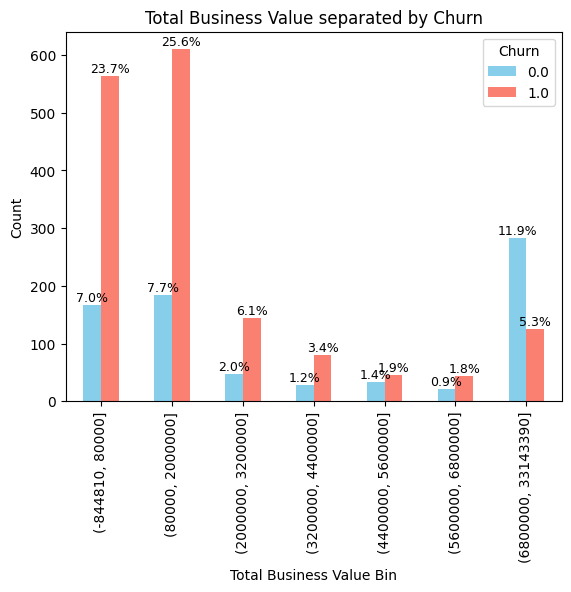

In [ ]:
# Binning the Total Business Value into categories
m1 = round(df_final['Total Business Value'].min())
m2 = round(df_final['Total Business Value'].max())
df_final['TBV_Bin'] = pd.cut(df_final['Total Business Value'], bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2])

# Total Business feature with Target (Churn)
tbvbin = pd.crosstab(df_final['TBV_Bin'], df_final['Churn'])
ax = tbvbin.plot(kind='bar', stacked=False, title="Total Business Value separated by Churn", color=['skyblue', 'salmon'])

plt.xlabel('Total Business Value Bin')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(tbvbin.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insights :**
 * Driver with low total business value under 2000k are likely to churn more.
 * Driver with total business value 3200K-6800K are less likely to churn.

**Qtr_Rating-Total Business Value Relationship**

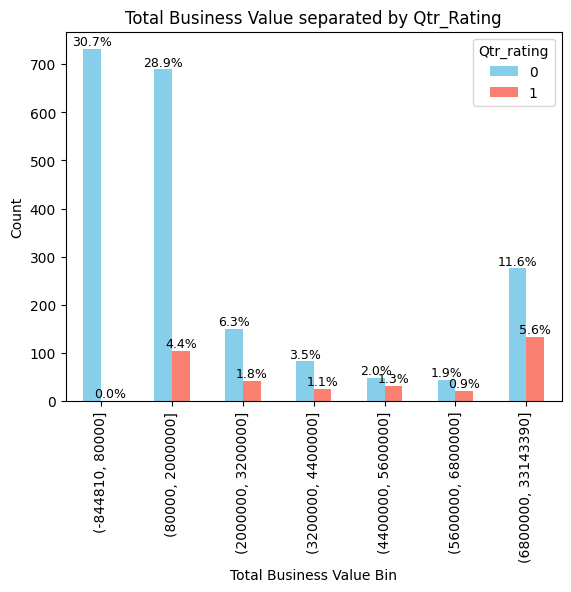

In [ ]:
# Binning the Total Business Value into categories
m1 = round(df_final['Total Business Value'].min())
m2 = round(df_final['Total Business Value'].max())
df_final['TBV_Bin'] = pd.cut(df_final['Total Business Value'], bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2])
# Total Business feature with Rating
tbvbin = pd.crosstab(df_final['TBV_Bin'], df_final['Qtr_Rating_Inc'])
ax = tbvbin.plot(kind='bar', stacked=False, title="Total Business Value separated by Qtr_Rating", color=['skyblue', 'salmon'])

plt.xlabel('Total Business Value Bin')
plt.ylabel('Count')
plt.legend(title='Qtr_rating', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(tbvbin.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insight:**
 * Drivers whom Qtr_Rating was not increased were procure significantly low Total Business also less 2000K brackets.

**Grade-Total Business Value Relationship**

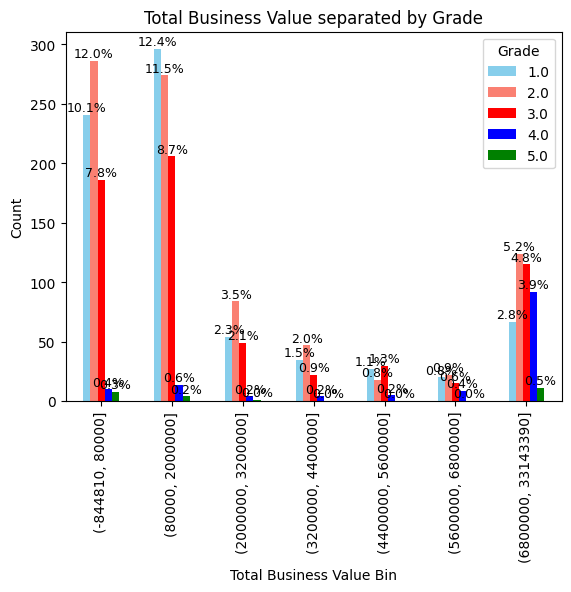

In [ ]:
# Binning the Total Business Value into categories
m1 = round(df_final['Total Business Value'].min())
m2 = round(df_final['Total Business Value'].max())
df_final['TBV_Bin'] = pd.cut(df_final['Total Business Value'], bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2])
# Total Business feature with Grade
tbvbin = pd.crosstab(df_final['TBV_Bin'], df_final['Grade'])
ax = tbvbin.plot(kind='bar', stacked=False, title="Total Business Value separated by Grade", color=['skyblue', 'salmon','r','b','g'])

plt.xlabel('Total Business Value Bin')
plt.ylabel('Count')
plt.legend(title='Grade', loc='upper right')

# Adding percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / sum(tbvbin.sum()) * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=9, xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Insight:**
 * Higher Grade drivers are procure higher Total Business Value

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   ReportingDate         2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   float64       
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   float64       
 6   Income                2381 non-null   float64       
 7   Joining Designation   2381 non-null   float64       
 8   Grade                 2381 non-null   float64       
 9   Dateofjoining         2381 non-null   datetime64[ns]
 10  Churn                 2381 non-null   float64       
 11  Total Business Value  2381 non-null   float64       
 12  Quarterly Rating      2381 non-null   float64       
 13  Yearofreporting   

In [ ]:
# We are dropping the bin columns we created for the target variable relationship.
# Also dropping ReportingDate and Dateofjoining
# Driver_ID also needs to be dropped as its a unique identifier.

df_final.drop(['Driver_ID', 'ReportingDate', 'Dateofjoining','Yearofreporting','Monthofjoining', 'Age_Bin','Income_Bin','TBV_Bin'],axis=1, inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   float64
 4   Income                2381 non-null   float64
 5   Joining Designation   2381 non-null   float64
 6   Grade                 2381 non-null   float64
 7   Churn                 2381 non-null   float64
 8   Total Business Value  2381 non-null   float64
 9   Quarterly Rating      2381 non-null   float64
 10  Monthofreporting      2381 non-null   float64
 11  Yearofjoining         2381 non-null   float64
 12  Qtr_Rating_Inc        2381 non-null   int64  
 13  Income_Inc            2381 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 260.5+ KB


**Correlation Check**

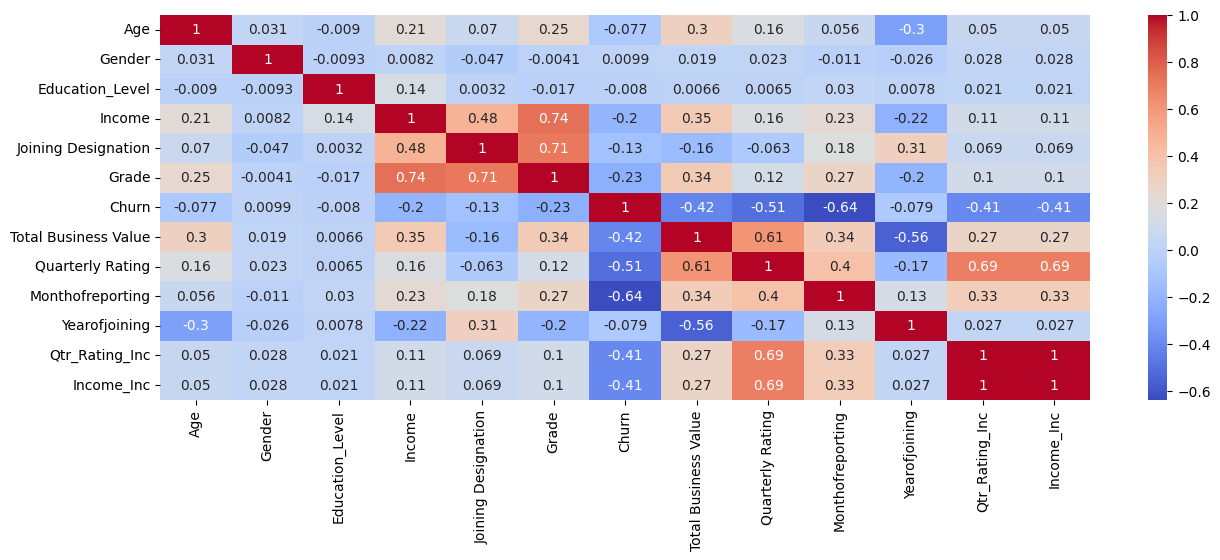

In [ ]:
# Plotting Heat Map to Check for Correlation
plt.figure(figsize=(15,5))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.show()

**Insights :**
 * Income and Grade are highly correlated.
 * Joining designation and grade are also highly correlated.
 * Total business value and grade and income are highly correlated. If the grade is high then the driver has a higher income and the probability of attrition is low.
 * Quarterly rating and Total Business Value are positively correlated. Meaning if the quarterly rating is high then total business acquired is also high and consequently less chance of driver attrition.
 * Negative correlation between churn with Rating, Income and Total Business Value. This indicates that drivers who are low in rating, procure low business thes income is also less have a high chance of attrition.
 * Negative correlation between attrition and month of reporting. This indicates that drivers who are not regular in reporting every month have a high chance of attrition

#**Data Preprocessing**

**Separating the features and target variable**

In [ ]:
X=df_final.drop(["Churn"], axis=1)
Y=df_final["Churn"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   float64
 1   Gender                2381 non-null   float64
 2   City                  2381 non-null   object 
 3   Education_Level       2381 non-null   float64
 4   Income                2381 non-null   float64
 5   Joining Designation   2381 non-null   float64
 6   Grade                 2381 non-null   float64
 7   Total Business Value  2381 non-null   float64
 8   Quarterly Rating      2381 non-null   float64
 9   Monthofreporting      2381 non-null   float64
 10  Yearofjoining         2381 non-null   float64
 11  Qtr_Rating_Inc        2381 non-null   int64  
 12  Income_Inc            2381 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 241.9+ KB


In [ ]:
X.shape,Y.shape

((2381, 13), (2381,))

**Date Imbalance Check**

In [ ]:
# Printing the percentage of row count per class label
print(df_final.Churn.value_counts(normalize=True).mul(100))
# # Printing the absolute row count per class label
print(df_final.Churn.value_counts())

1.0    67.870643
0.0    32.129357
Name: Churn, dtype: float64
1.0    1616
0.0     765
Name: Churn, dtype: int64


**Insights :**
 * We observe the imbalance between the 2 classes, Not Churn (Class 0) and Churn (Class 1). The imbalance ratio Class 0: Class 1 is almost 1:2
 * We will perform oversampling (SMOTE) to address this imbalance.

**Train-Test Split**

In [ ]:
# Splitting the data into train and test
x_train,X_test,y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Splitting the Training data into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42)

In [ ]:
print(f'Shape of x_train : {X_train.shape} & shape of y_train is : {Y_train.shape}')
print(f'Shape of x_val : {X_val.shape} & shape of y_val is : {Y_val.shape}')
print(f'Shape of x_test : {X_test.shape} & shape of y_test is : {Y_test.shape}')

Shape of x_train : (1523, 13) & shape of y_train is : (1523,)
Shape of x_val : (381, 13) & shape of y_val is : (381,)
Shape of x_test : (477, 13) & shape of y_test is : (477,)


**Target Encoding**

In [ ]:
cat_cols=["City"]
enc= TargetEncoder(cols=cat_cols).fit(X_train,Y_train)
X_train= enc.transform(X_train)

In [ ]:
# Target encoding of the validation and test data
X_val= enc.transform(X_val,Y_val)
X_test= enc.transform(X_test,Y_test)

#**Building the Model**

#**Model 1: Baseline model using single Decision Tree**

In [ ]:
# We train a simple decision tree using K-fold cross validation
# And Grid Search for best hyper-param selection
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate, cross_val_score

params = {"max_depth" : [3, 5, 7, 9],"max_leaf_nodes" : [6, 10, 12, 16]}
kfold = KFold(n_splits=10)
model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "f1", cv=kfold) # as the data is imbalanced, we will use f1 score
clf.fit(X_train, Y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(clf)

Best parameters are : {'max_depth': 5, 'max_leaf_nodes': 6}
The score is : 0.9623684821759921


**Tunning the Hyperparameters**

In [ ]:
# Tunning the Hyperparameter
params = {"max_depth" : [3, 4, 5, 6, ],"max_leaf_nodes" : [5, 6, 7, 8]}
model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "f1", cv=kfold) # as the data is imbalanced, we will use f1 score
clf.fit(X_train, Y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(clf)

Best parameters are : {'max_depth': 5, 'max_leaf_nodes': 6}
The score is : 0.9623684821759921


In [ ]:
res = clf.cv_results_
for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 3, 'max_leaf_nodes': 5} Mean_score: 0.9567233817412892 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 6} Mean_score: 0.9567233817412892 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 7} Mean_score: 0.9567233817412892 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 8} Mean_score: 0.9567233817412892 Rank: 13
Parameters:{'max_depth': 4, 'max_leaf_nodes': 5} Mean_score: 0.9593816559871801 Rank: 7
Parameters:{'max_depth': 4, 'max_leaf_nodes': 6} Mean_score: 0.9589129807121919 Rank: 10
Parameters:{'max_depth': 4, 'max_leaf_nodes': 7} Mean_score: 0.9584351717372647 Rank: 11
Parameters:{'max_depth': 4, 'max_leaf_nodes': 8} Mean_score: 0.957011618864611 Rank: 12
Parameters:{'max_depth': 5, 'max_leaf_nodes': 5} Mean_score: 0.9593816559871801 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 6} Mean_score: 0.9623684821759921 Rank: 1
Parameters:{'max_depth': 5, 'max_leaf_nodes': 7} Mean_score: 0.9618994610231381 Rank: 3
Parameters:{'max_depth': 5

In [ ]:
# Training the MODEL using the best hyperparameters
model1 = clf.best_estimator_
model1 = clf.best_estimator_
model1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6)

In [ ]:
print("Train accuracy: {:.2f}".format(model1.score(X_train, Y_train)*100))
print("Validation accuracy: {:.2f}".format(model1.score(X_val, Y_val)*100))

Train accuracy: 95.14
Validation accuracy: 92.91


**Looking model performance is decent, now test with testing data**

In [ ]:
# Learning Curves in sklearn

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

    fig, axes = plt.subplots(1, 1, figsize = (10, 5))

    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
  )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
  )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
    axes.legend(loc="best")

    plt.show()

Model Performance Metrics


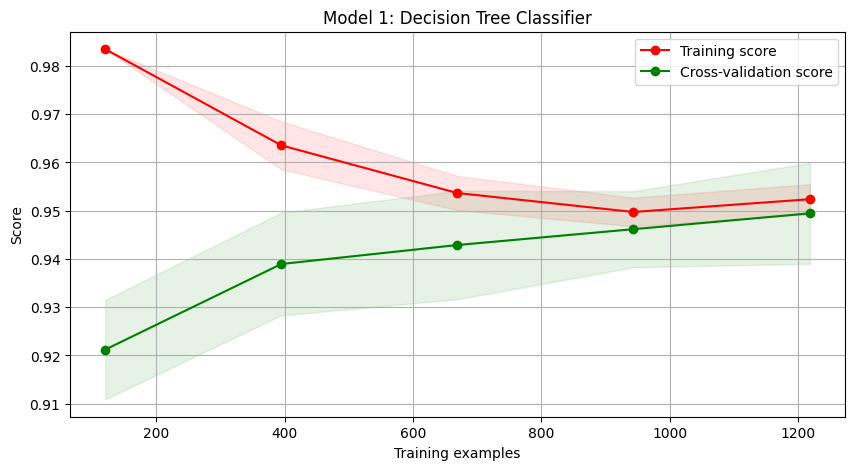

                                    precision    recall  f1-score   support

Not leaving the company (Churn:0)        0.91      0.92      0.92       150
     Leaving the company (Churn:1)       0.96      0.96      0.96       327

                          accuracy                           0.95       477
                         macro avg       0.94      0.94      0.94       477
                      weighted avg       0.95      0.95      0.95       477

Test Accuracy : 94.75890985324948%
recall_score : 96.02446483180428%
precision_score : 96.31901840490798%
f1_score : 96.17151607963245%
Model 1: Decision Tree Classifier Sensitivity:0.96
Model 1: Decision Tree Classifier Specificity:0.92


In [ ]:
print("Model Performance Metrics")
plot_learning_curve(model1, X_train, Y_train, "Model 1: Decision Tree Classifier")
Y_pred_model1 = model1.predict(X_test)
print(f"{classification_report(Y_test, Y_pred_model1, target_names=['Not leaving the company (Churn:0) ','Leaving the company (Churn:1)'])}")
# more data could help as CV-score is improving as datset size increases.


print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred_model1)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred_model1)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred_model1)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred_model1)*100}%")


confusion = confusion_matrix(Y_test, Y_pred_model1)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculate the sensitivity
print(f"Model 1: Decision Tree Classifier Sensitivity:{np.round(TP/(TP+FN),2)}")

# Calculate the specificity
print(f"Model 1: Decision Tree Classifier Specificity:{np.round(TN/(TN+FP),2)}")

AUC SCORE :0.9589092762487258


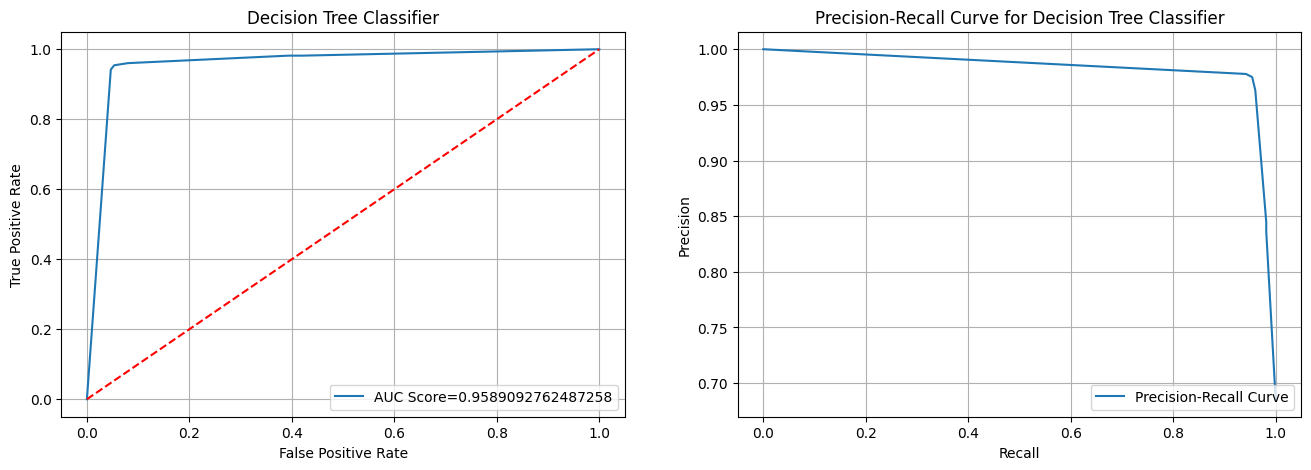

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#Create ROC curve and PR curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("Decision Tree Classifier")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Decision Tree Classifier")
plt.show()

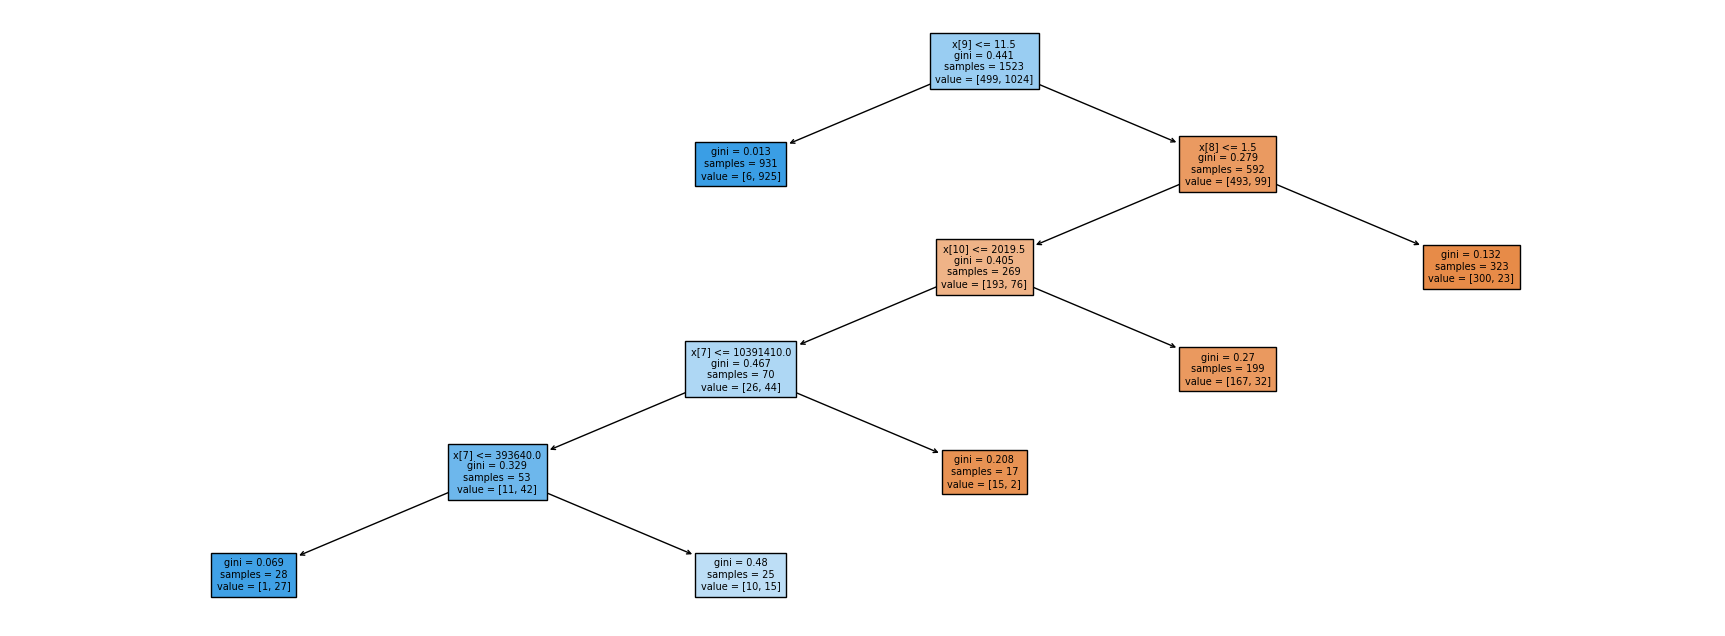

In [ ]:
# plot the decision tree
from sklearn import tree
plt.figure(figsize=(22,8))  # set plot size (denoted in inches)
tree.plot_tree(model1, fontsize=7, filled=True)
plt.show()

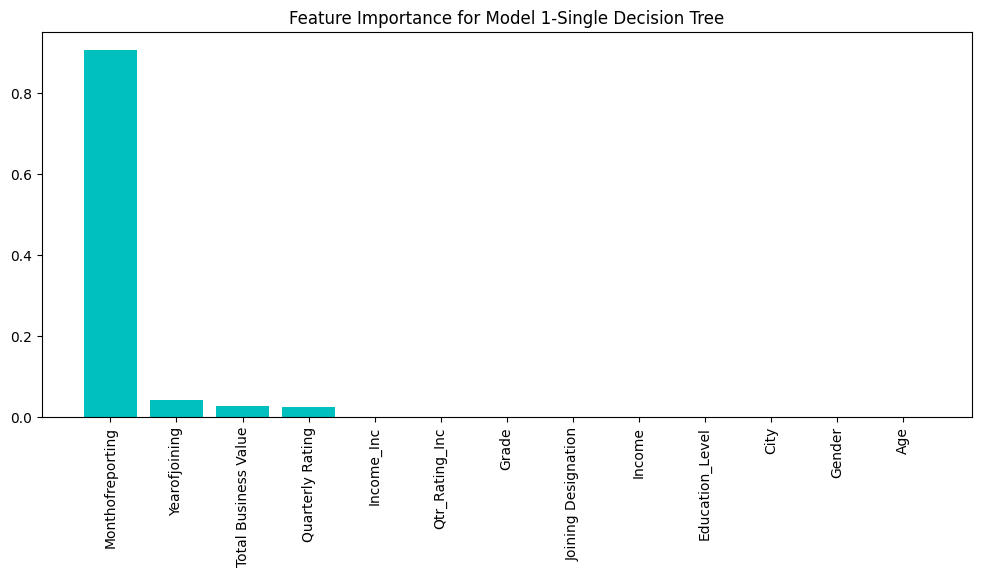

In [ ]:
# Feature Importance
importances = model1.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 1-Single Decision Tree") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices], color='c') # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights : Observations from Model 1 Decision Tree Classifier:**
 * Best Hyperparameters are : {max_depth = 5, max_leaf_nodes = 6, score = 0.96}
 * The f1 score for predicting leaving the company is 0.96
 * The recall score for predicting leaving the company is 0.96
 * The precision score for predicting leaving the company is 0.96
 * The AUC score for predicting leaving the company is 0.96
 * Model Sensitivity : 0.96
 * Model Specificity : 0.92
 * The most important features according to model 1 are Month of Reporting followed by Year of joining, Total Business Value, and Quarterly Rating.

#**Model 2 : Random Forest Classifier**

In [ ]:
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier

param = {'max_depth':[6,9,13,17], 'n_estimators':[100,140,160,200]}
kfold = KFold(n_splits=10)
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=kfold,scoring='f1') # as the data is imbalanced, we will use f1 score
c.fit(X_train, Y_train)


def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 13, 'n_estimators': 200}
The score is : 0.9635161796002626


**Tunning the Hyperparameters**

In [ ]:
# Tuning the hyperparameter
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier

param = {'max_depth':[11,12,13,14,15], 'n_estimators':[190,195,200,205,210]}
kfold = KFold(n_splits=10)
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=kfold,scoring='f1') # as the data is imbalanced, we will use f1 score
c.fit(X_train, Y_train)


def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 13, 'n_estimators': 195}
The score is : 0.9621194396119324


In [ ]:
# Tuning the hyperparameter
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier

param = {'max_depth':[11,12,13,14], 'n_estimators':[194,195,196,197,198,199,200]}
kfold = KFold(n_splits=10)
random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=kfold,scoring='f1') # as the data is imbalanced, we will use f1 score
c.fit(X_train, Y_train)


def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

Best parameters are : {'max_depth': 13, 'n_estimators': 197}
The score is : 0.9629744483528271


In [ ]:
res = c.cv_results_

for i in range(len(res["params"])):
    print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")

Parameters:{'max_depth': 11, 'n_estimators': 194} Mean_score: 0.960911435333778 Rank: 17
Parameters:{'max_depth': 11, 'n_estimators': 195} Mean_score: 0.9614436413810392 Rank: 11
Parameters:{'max_depth': 11, 'n_estimators': 196} Mean_score: 0.9618267267781258 Rank: 6
Parameters:{'max_depth': 11, 'n_estimators': 197} Mean_score: 0.959901762364681 Rank: 27
Parameters:{'max_depth': 11, 'n_estimators': 198} Mean_score: 0.9609646772937147 Rank: 16
Parameters:{'max_depth': 11, 'n_estimators': 199} Mean_score: 0.9619525571354991 Rank: 4
Parameters:{'max_depth': 11, 'n_estimators': 200} Mean_score: 0.9604626874248028 Rank: 21
Parameters:{'max_depth': 12, 'n_estimators': 194} Mean_score: 0.9619229138875607 Rank: 5
Parameters:{'max_depth': 12, 'n_estimators': 195} Mean_score: 0.9614421631293617 Rank: 12
Parameters:{'max_depth': 12, 'n_estimators': 196} Mean_score: 0.9614998427997203 Rank: 8
Parameters:{'max_depth': 12, 'n_estimators': 197} Mean_score: 0.9614461876293026 Rank: 10
Parameters:{'max

**Training on Best Hyperparameters**

In [ ]:
random_forest=c.best_estimator_
random_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=197)

In [ ]:
print("Train accuracy: {:.2f}".format(random_forest.score(X_train, Y_train)*100))
print("Validation accuracy: {:.2f}".format(random_forest.score(X_val, Y_val)*100))

Train accuracy: 95.14
Validation accuracy: 92.91


**Looking model performance is decent, now test with testing data**

 Model 2: Random Forest Classifier: Performance Report


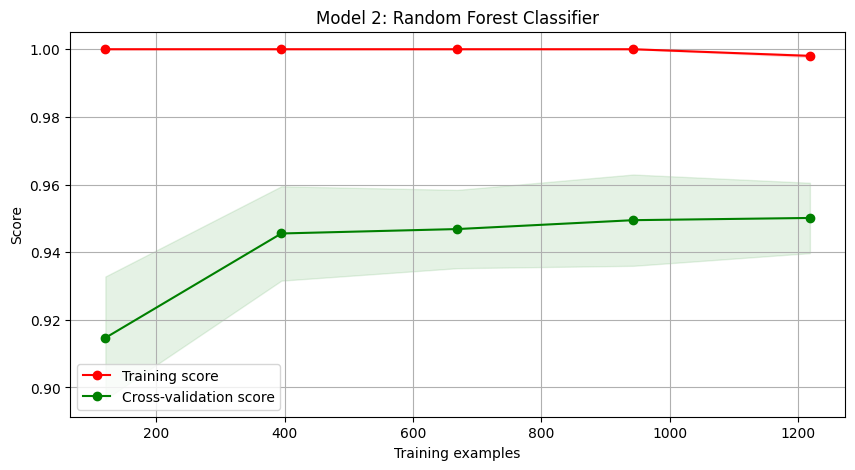

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.93      0.93      0.93       150
    Leaving the company (Churn:1)       0.97      0.97      0.97       327

                         accuracy                           0.95       477
                        macro avg       0.95      0.95      0.95       477
                     weighted avg       0.95      0.95      0.95       477

Test Accuracy : 95.38784067085953%
recall_score : 96.63608562691131%
precision_score : 96.63608562691131%
f1_score : 96.63608562691131%
[[139  11]
 [ 11 316]]
Model 2 Sensitivity: 0.97
Model 2 Specificity: 0.93


In [ ]:
print(" Model 2: Random Forest Classifier: Performance Report")

Y_pred = random_forest.predict(X_test)
plot_learning_curve(random_forest, X_train, Y_train, "Model 2: Random Forest Classifier")
print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")

print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 2 Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 2 Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.961651376146789


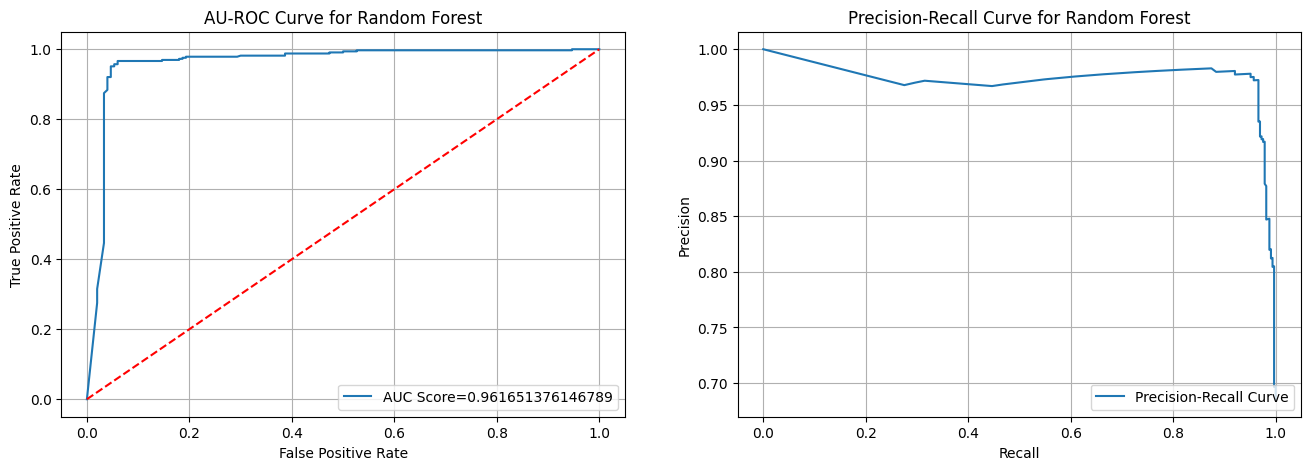

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = random_forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
#Create ROC curve and PR curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for Random Forest")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for Random Forest")
plt.show()

**Feature Importance**

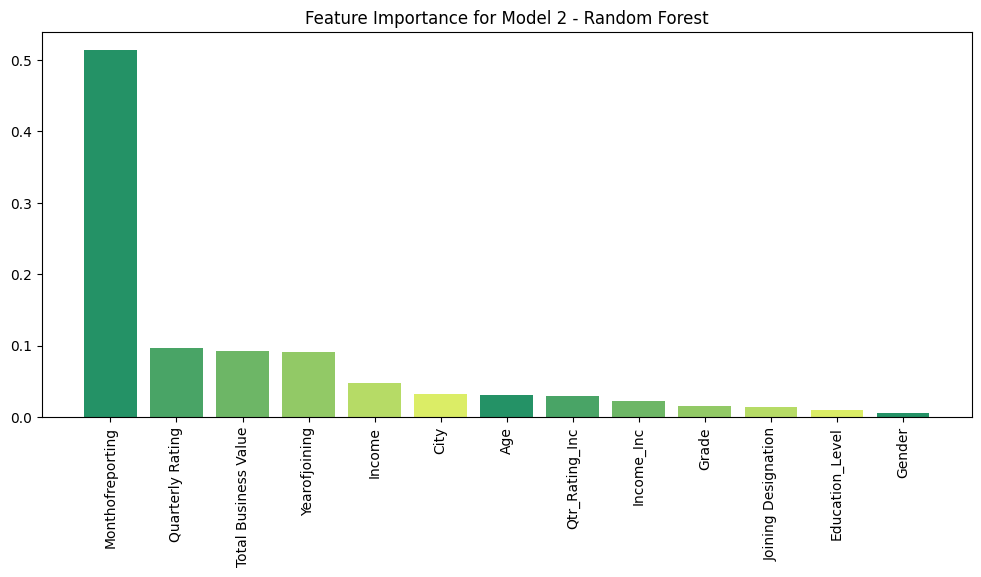

In [ ]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 2 - Random Forest") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("summer")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights from Model 2- Random Forest Classifier (RF):**
 * Best parameters are : {'max_depth': 13, 'n_estimators': 195, score : 0.96}
 * Test Accuracy : 0.95
 * f1_score : 0.96
 * The recall score for predicting leaving the company is 0.97
 * The precision score for predicting leaving the company is 0.97
 * The AUC score for predicting leaving the company is 0.96
 * Model Sensitivity:0.97
 * Model Specificity:0.93
 * Most important features(highest to lowest): Month Of Reporting followed by Quarterly Rating, Total Business Value, Year of Joining, Income, city, Age and Quarterly Rating Increment.
 * Significant advantage is this RF model captures the feature importance more accurately.
 * Model 2 with the random forest classifier has better precision, recall,sensitivity and specificity metric than model1 Decision Tree Classifier.

#**Model 3: Gradient Boosted Decision Tree (GBDT) Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

params = {
        'learning_rate': [0.01, 0.1, 0.2, 0.4],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],     # concept of bagging - row sampling
        'max_depth': [4, 6, 8, 10, 12],
    'n_estimators':[200, 230, 250, 280, 300]
        }

model3=GBDT()
folds = 3
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 7)
random_search = RandomizedSearchCV(model3, param_distributions=params, n_iter=10, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train), random_state=7 )
# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores
start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

print('\n Best hyperparameters:')
print(random_search.best_params_)
print(f'The score is : {random_search.best_score_}')


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01}
The score is : 0.961550002539227


**Tunning the Hyperparameters**

In [ ]:
# Tunning the Hyperameter by grid search
params = {
        'learning_rate': [0.01, 0.1, 0.12],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.7, 0.8, 0.9],     # concept of bagging in xgboost- row sampling
        'max_depth': [2,3, 4, 5, ],
    'n_estimators':[195, 200, 205]
        }

model3=GBDT()
kfold = KFold(n_splits=10)
grid_search = GridSearchCV(model3,params, scoring='f1', n_jobs=4, cv=kfold) # n_jobs=4= it will try to distribute it across 4 cores
start = dt.datetime.now()
grid_search.fit(X_train, Y_train)
end = dt.datetime.now()

print('\n Best hyperparameters:')
print(grid_search.best_params_)
print(f'The score is : {grid_search.best_score_}')


 Best hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
The score is : 0.9641592836484782


**Training GBDT on the best hyperparameters identified during StratifiedKFold cross validation**

In [ ]:
best_gbdt = GBDT(subsample=0.9, n_estimators=200, max_depth=3, learning_rate= 0.1)
best_gbdt.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=200, subsample=0.9)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_gbdt.score(X_train, Y_train)}\nValidation Accuracy:{best_gbdt.score(X_val, Y_val)}")

Time taken for training : 0:13:47.571013
Training accuracy:0.9888378200919238
Validation Accuracy:0.9186351706036745


 Model 3: GBDT Performance Report


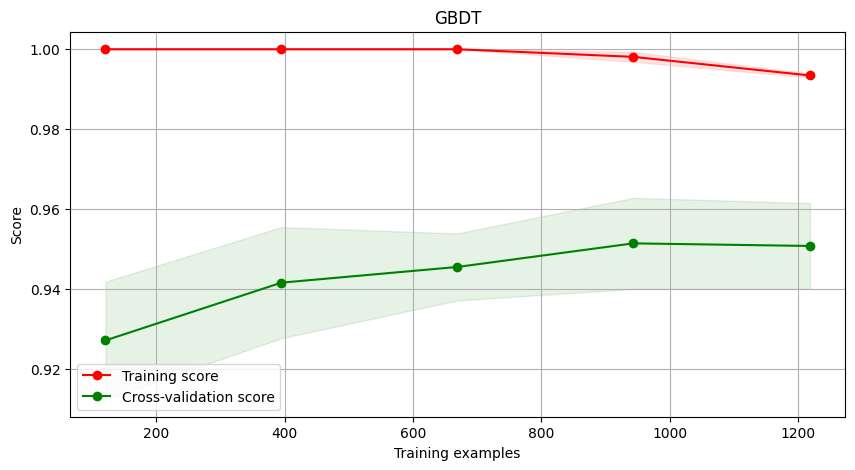

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.92      0.91      0.91       150
    Leaving the company (Churn:1)       0.96      0.96      0.96       327

                         accuracy                           0.95       477
                        macro avg       0.94      0.93      0.94       477
                     weighted avg       0.95      0.95      0.95       477

Test Accuracy : 94.54926624737946%
recall_score : 96.3302752293578%
precision_score : 95.74468085106383%
f1_score : 96.03658536585367%
[[136  14]
 [ 12 315]]
Model 3: GBDT Sensitivity: 0.96
Model 3: GBDT Specificity: 0.91


In [ ]:
print(" Model 3: GBDT Performance Report")

# Predicting the Test set results
Y_pred = best_gbdt.predict(X_test)
plot_learning_curve(best_gbdt, X_train, Y_train, "GBDT")
print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(f"Model 3: GBDT Sensitivity: {np.round((TP/(TP+FN)),2)}")
# Calculate the specificity

print(f"Model 3: GBDT Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.969704383282365


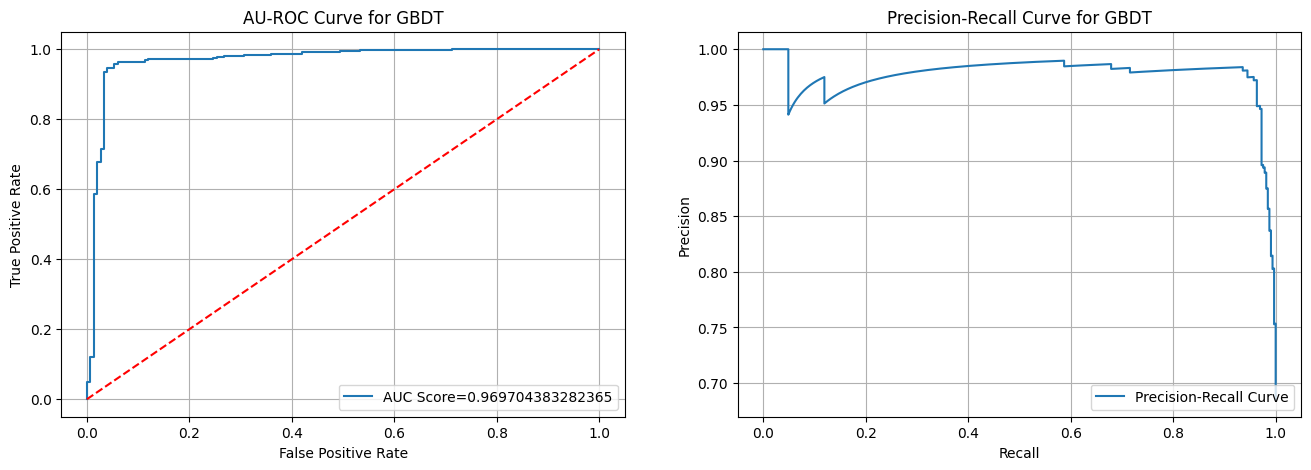

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = best_gbdt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#Create ROC curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for GBDT")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for GBDT")
plt.show()


**Feature Importance**

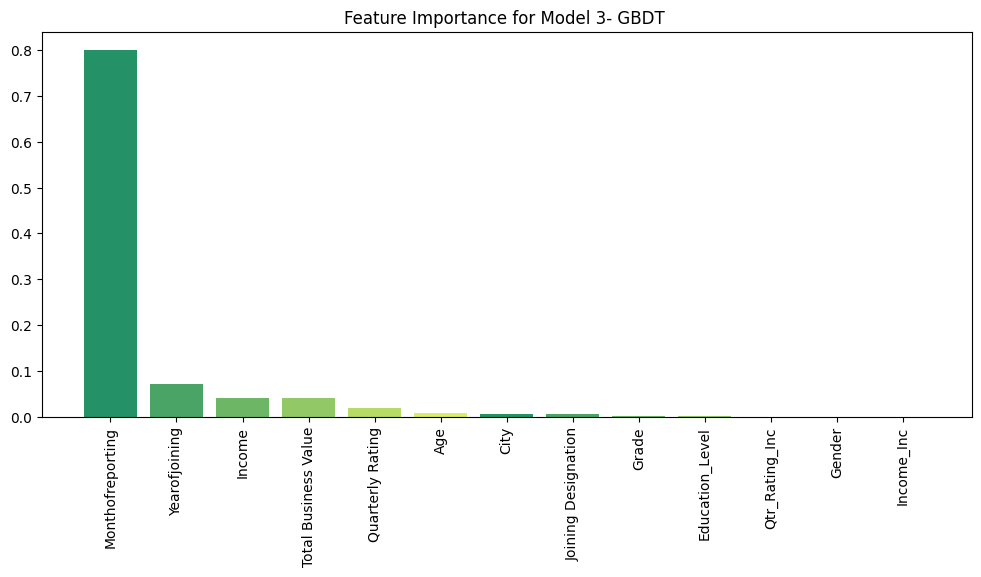

In [ ]:
importances =best_gbdt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 3- GBDT ") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("summer")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights from Model 3 - Gradient Boosted Decision Tree (GBDT) Classifier:**
 * Best hyperparameters:{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
 * Test Accuracy : 0.95
 * f1_score : 0.96
 * The recall score for predicting leaving the company is 0.96
 * The precision score for predicting leaving the company is 0.96
 * The AUC score for predicting leaving the company is 0.97
 * Model Sensitivity:0.96
 * Model Specificity:0.91
 * Top most important features (Highest to lowest): Month Of Reporting followed by Year of joining, Income, Total Business Value, Quarterly Rating, Age and City.
 * Model 3 with the GBDT classifier has higher AUC score compared to Model 2 Random Forest Classifier. Slightly different order of feature importances is observed with GBDT

#**Model 4: XGBOOST Classifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold  #StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains
#approximately the same percentage of samples of each target class as the complete set.Our dataset has balanced classes, so not useful.
import datetime as dt

params = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.4, 0.6, 0.8, 1.0],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5],
    'n_estimators':[100,150,200,250]
        }
xgb = XGBClassifier()

folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 7)

random_search1 = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train), random_state=7 )
# number of iterations=10, n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
random_search1.fit(X_train, Y_train)
end = dt.datetime.now()

print('\n Best hyperparameters:')
print(random_search1.best_params_)
print(f'The score is : {random_search1.best_score_}')


 Best hyperparameters:
{'subsample': 0.4, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
The score is : 0.9621331645058997


**Tunning the Hyperparameters**

In [ ]:
# Tunning the Hyperparameter by grid search
params4 = {
        'learning_rate': [0.001, 0.01, 0.1, 0.2],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.2, 0.3, 0.4, 0.5],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
        'max_depth': [2, 3, 4],
    'n_estimators':[230,240,250,260,270]
        }
xgb = XGBClassifier()
kfold = KFold(n_splits=10)

grid_search1 = GridSearchCV(xgb, params4, scoring='f1', n_jobs=4, cv=kfold ) # n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
grid_search1.fit(X_train, Y_train)
end = dt.datetime.now()

print('\n Best hyperparameters:')
print(grid_search1.best_params_)
print(f'The score is : {grid_search1.best_score_}')


 Best hyperparameters:
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 230, 'subsample': 0.5}
The score is : 0.9628144308597415


In [ ]:
# Tunning the Hyperparameter by grid search
params4 = {
        'learning_rate': [0.001, 0.01, 0.1],   # shrinkage coefficient - "v" [0,1]
        'subsample': [0.2, 0.3, 0.4, 0.5],     # concept of bagging in xgboost- row sampling
        'colsample_bytree': [0.5, 0.6, 0.7],
        'max_depth': [2, 3],
    'n_estimators':[220,225,230,235,240]
        }
xgb = XGBClassifier()
kfold = KFold(n_splits=10)

grid_search1 = GridSearchCV(xgb, params4, scoring='f1', n_jobs=4, cv=kfold ) # n_jobs=4= it will try to distribute it across 4 cores

start = dt.datetime.now()
grid_search1.fit(X_train, Y_train)
end = dt.datetime.now()

print('\n Best hyperparameters:')
print(grid_search1.best_params_)
print(f'The score is : {grid_search1.best_score_}')


 Best hyperparameters:
{'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 230, 'subsample': 0.5}
The score is : 0.9628144308597415


**Training the model on the complete data using the best hyperparameters**

In [ ]:
best_xgb = XGBClassifier(n_estimators=230,subsample=0.5, max_depth=2, learning_rate=0.01, colsample_bytree=0.6)
best_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=230, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nValidation Accuracy: {best_xgb.score(X_val, Y_val)}")

Time taken for training : 0:04:51.460113
Training accuracy:0.9507550886408405
Validation Accuracy: 0.9291338582677166


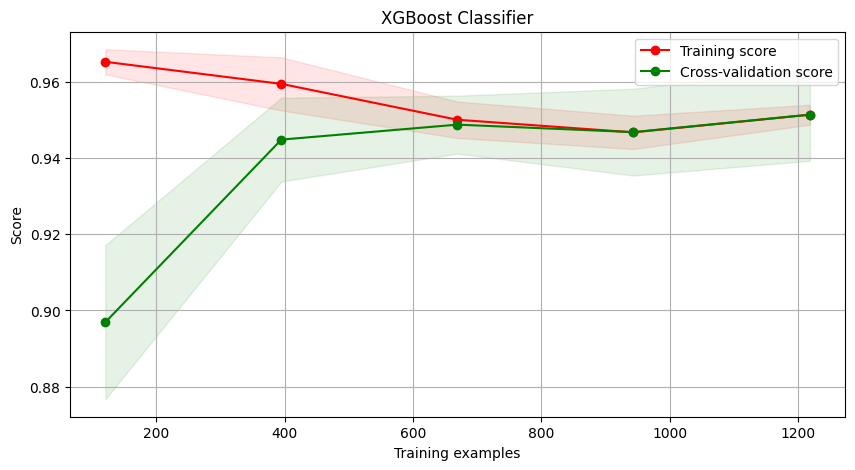

                                   precision    recall  f1-score   support

Not leaving the company (Churn:0)       0.91      0.92      0.92       150
    Leaving the company (Churn:1)       0.96      0.96      0.96       327

                         accuracy                           0.95       477
                        macro avg       0.94      0.94      0.94       477
                     weighted avg       0.95      0.95      0.95       477

Test Accuracy : 94.75890985324948%
recall_score : 96.02446483180428%
precision_score : 96.31901840490798%
f1_score : 96.17151607963245%
[[138  12]
 [ 13 314]]
Model 4: XGBoost Sensitivity: 0.96
Model 4: XGBoost Specificity: 0.92


In [ ]:
# Predicting the Test set results
Y_pred = best_xgb.predict(X_test)
plot_learning_curve(best_xgb, X_train, Y_train, "XGBoost Classifier")


print(f"{classification_report(Y_test, Y_pred, target_names=['Not leaving the company (Churn:0)','Leaving the company (Churn:1)'])}")
print(f"Test Accuracy : {accuracy_score(Y_test, Y_pred)*100}%")
print(f"recall_score : {recall_score(Y_test, Y_pred)*100}%")
print(f"precision_score : {precision_score(Y_test, Y_pred)*100}%")
print(f"f1_score : {f1_score(Y_test, Y_pred)*100}%")

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

confusion = confusion_matrix(Y_test, Y_pred)
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Calculate the sensitivity
print(f"Model 4: XGBoost Sensitivity: {np.round((TP/(TP+FN)),2)}")

# Calculate the specificity
print(f"Model 4: XGBoost Specificity: {np.round((TN/(TN+FP)),2)}")

AUC SCORE :0.9660856269113149


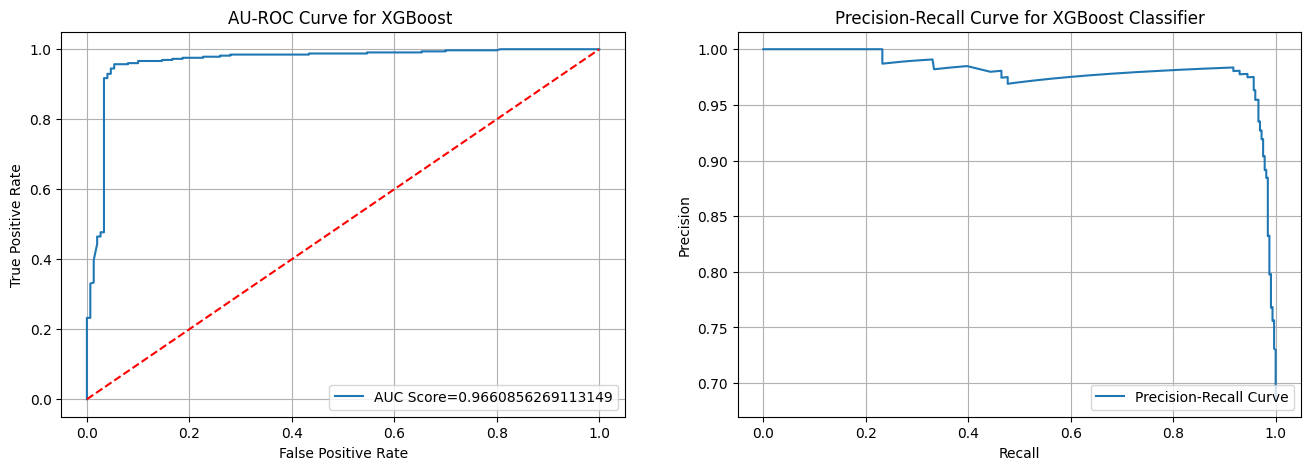

In [ ]:
# AUC- ROC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

Y_pred_proba = best_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)

#Create ROC curve
fig, a = plt.subplots(1,2,squeeze=False,figsize=(16,5))
a[0][0].plot(fpr,tpr,label="AUC Score="+str(auc))
a[0][0].plot([0, 1], [0, 1],'r--')
a[0][0].set_ylabel('True Positive Rate')
a[0][0].set_xlabel('False Positive Rate')
a[0][0].legend(loc=4)
a[0][0].grid()
a[0][0].set_title("AU-ROC Curve for XGBoost ")
print(f"AUC SCORE :{auc}" )

# Precision Recall Curve
pre, re,_ = precision_recall_curve(Y_test, Y_pred_proba)
a[0][1].plot(re, pre, label='Precision-Recall Curve')
a[0][1].set_ylabel('Precision')
a[0][1].set_xlabel('Recall')
a[0][1].legend(loc=4)
a[0][1].grid()
a[0][1].set_title("Precision-Recall Curve for XGBoost Classifier")
plt.show()

**Feature Importances using XGBoost**

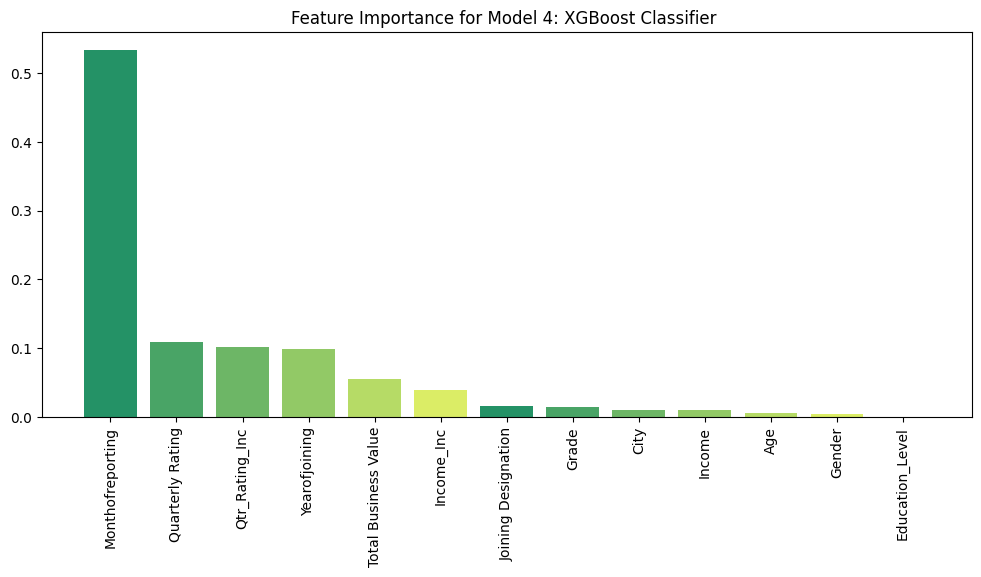

In [ ]:
importances =best_xgb.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(12, 5)) # Create plot
plt.title("Feature Importance for Model 4: XGBoost Classifier ") # Create plot title
plt.bar(range(X_test.shape[1]), importances[indices],color=sns.color_palette("summer")) # Add bars
plt.xticks(range(X_test.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

**Insights from Model 4-XGBoost Classifier:**
* XGBoost Best hyperparameters: { n_estimators=230, subsample=0.5, max_depth=2, learning_rate=0.01, colsample_bytree=0.6 }
* The AUC score for predicting leaving the company is 0.97
* Test Accuracy : 0.95
* f1_score : 0.96
* The recall score for predicting leaving the company is 0.96
* The precision score for predicting leaving the company is 0.96
* Model Sensitivity:0.96
* Model Specificity:0.92
* Top most important features: Month Of Reporting followed by Quarterly Rating Increment, Year of Joining, Total Business Value, Income Increment, Joining Designation
* We obtained the euivalant AUC score of 0.97 with the XGBoost model to the previous GBDT model with 0.97.

#**Questionnaire :**
**1.** What percentage of drivers have received a quarterly rating of 4?

**Ans:** 10.3 %

2. Comment on the correlation between Age and Quarterly Rating.

**Ans:** Correlation between Age and Quarterly not very significant, very low positive correlation of 0.16.

3. Name the city which showed the most improvement in Quarterly Rating over
the past year.

**Ans:** C29

4. Drivers with a higher Grade are more likely to have a higher Total Business Value.(T/F)

**Ans:** True, Higher Grade drivers are procure higher Total Business Value

5. If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

**Ans:** Drivers whom Qtr_Rating was not increased were procure significantly low Total Business also less 2000K brackets.

6. From Ola's perspective, which metric should be the primary focus for driver
retention?
1. ROC AUC
2. Precision
3. Recall
4. F1 Score

**Ans:**
  * When considering driver retention from Ola's perspective, the primary focus metric would likely be Recall.

  * Recall in this context refers to the ability to identify and retain drivers who are likely to leave (churn). Maximizing recall means correctly identifying as many potentially churning drivers as possible, minimizing false negatives (identifying them as staying when they might leave).

* While metrics like ROC AUC, Precision, and F1 Score are also important, Recall holds significance because it directly addresses the need to capture as many potentially departing drivers as possible. This allows Ola to take proactive measures (such as incentives or interventions) to retain these drivers and reduce churn.

#**Insight:**
* It is a no-brainer that the cost of acquiring new drivers is at least 5X the cost of retention. In our analysis we evaluated four tree-based models and can rank them as follows based on their prediction performance metrics:
  * Model4 (XGBoost) > Model3 (GBDT) > Model2 (Random Forest) > Model1 (Decision Trees)


* Using the feature importance insights generated from the models, some important predictors of driver attrition are :
 * Month and Year of Reporting: Drivers who actively reported into the system every month were less likely to leave.
 * Quarterly Performance Rating Increase: Drivers with an increase in their quarterly rating were more likely to stay with the company.
 * Total Business Value: This is an important feature in predicting if a driver is going to leave the company or not.
 * Income/Grade: Income plays an important role in predicting the driver attrition.

  * Drivers who left have negligible salary hike.
 * Drivers who left have lesser income median as compare to who did not exit.
 * Total Business Value generated by non-churn drivers much higher than churn drivers.
 * Grade '1' drivers churn more than other Grade drivers.
 * Additional info is required to make more accurate prediction like
  • Hours spent in driving
  • Miles covered per day
  • Climate Temperature
  • Average min per trip


 * So we see that there are 57% male employees and 43% female employees.
 * The percentages of employees with different education levels are almost same for level 1 & 2.

 * Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
 * Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.

#**Recommendation:**

 * Company should reward such drivers with points. Company can leverage gamification based motivation strategy where drivers rank up through different levels and accumulate points for continued consistency on the system

 * Company should identify the driver profile with low/high quarterly rating and extend loyalty programs that incentivizes performance improvements. Quarterly performance reviews and additional training could be imparted to the drivers whose rating has not increased over the last quarter so that issues can be identified with concerned drivers and attrition can be prevented

 * The total business value is the total business that a driver generates, the company should set small financial milestones for the drivers to work through. The company should roll out a reward and recognition program for the drivers who meet their milestones

 * Company should ensure that the drivers have enough opportunities and motivation to increase their monthly average income above a certain threshold. Another option to ease the financial burden on the drivers and increase their morale is to provide vehicle maintenance offers, insurance policies, health checkups, and special education programs etc.

 * Salary increment would help retain more drivers.

 * Lunch food coupons will also help in stopping driver churn.

 * More Proactive counselling will help better understand concerns of drivers